# Hypothesis testing simulation

## Use-case

Imagine you are the owner of two stores with electronics. In both stores, you sell the same model of a cell-phone at the same price. Because you have the daily sales history from both stores, you are curious if the sales of this cell-phone are the same.

## Simulation

In [1]:
# import numpy
import numpy as np

# set a random seed to replicate results
np.random.seed(42)

Since we don't have real data, we will simulate our one-year sales with np.random.normal function.

In [2]:
# sales history in days
history = 365

# generate one-year sales for store A
mean_A = 20
std_A = 5
shop_A_sales = np.random.normal(mean_A, std_A, history)

# generate one-year sales for store B
mean_B = 19.5
std_B = 5
shop_B_sales = np.random.normal(mean_B, std_B, history)

We will be testing the following hypothesis: 

- H0 = the mean of sales of shop A equals to the mean of sales of shop B (i.e. the difference between the sales is equal to zero) 

- HA = the means are not equal

Set the significance level alpha (the probability of rejecting the null hypothesis when it is true) to 0.05.

In [3]:
# set the significance level
alpha = 0.05

The means of sales for both stores are:

In [4]:
# print the store A mean
print(shop_A_sales.mean())

# print the store B mean
print(shop_B_sales.mean())

# the differnce in the means
observed_means_diff = shop_A_sales.mean() - shop_B_sales.mean()
print(observed_means_diff)

20.04973201106029
19.309929401404304
0.7398026096559853


Because the mean of sales in the store A is not so far from the mean of sales in the store B, and their standard deviations are equal, it is tough to decide if the sales are equal.

Let's simulate what it would look like if both stores' sales were identically distributed. We can do that by putting sales data from both stores together.

In [26]:
both_sales = np.concatenate((shop_A_sales, shop_B_sales))
both_sales.shape

(730,)

Now, we have to perform permutation on both_sales and re-create the sales with this permutation data.

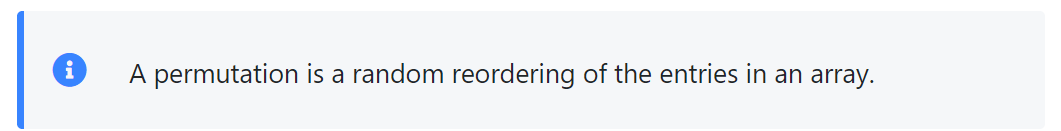

In [10]:
# permutation
sales_perm = np.random.permutation(both_sales)

In [14]:
# permutation replicates 
perm_shop_A_sales = sales_perm[:history]
perm_shop_B_sales = sales_perm[history:]

After this step, we have to compute the difference between the permutation replicates means.

In [16]:
print(perm_shop_A_sales.mean() - perm_shop_B_sales.mean())

0.21098789154327235


We can see that there is a difference between the permutation replicates mean and the original sales mean. But this was only one permutation. 

Let's try 1,000 different permutations and store the differences of the permutation replicates means in a list.

In [17]:
# create an empty list to store the permutation replicates means
perm_repl_means = []

for _ in range(1000):
    # permutation 
    sales_perm = np.random.permutation(both_sales)

    # permutation replicates 
    perm_shop_A_sales = sales_perm[:len(shop_A_sales)]
    perm_shop_B_sales = sales_perm[len(shop_A_sales):]

    # permutation replicates mean
    perm_repl_mean = perm_shop_A_sales.mean() - perm_shop_B_sales.mean()

    # append perm_repl_mean to list
    perm_repl_means.append(perm_repl_mean)b

In [29]:
np.mean(perm_repl_means)

-6.331366705438768e-06

The last thing that remains is to compute the p-value.

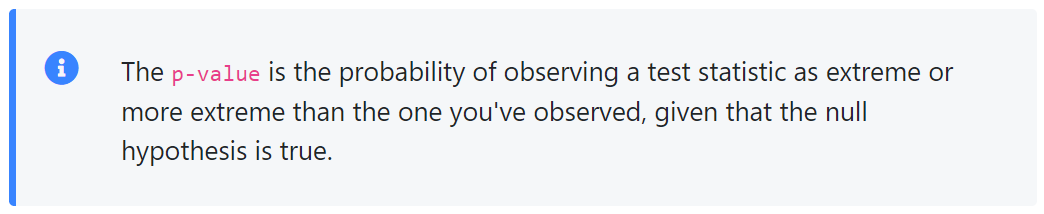

In [21]:
# compute the p-value
p = np.sum(np.abs(perm_repl_means) >= observed_means_diff) / len(perm_repl_means)

# print the result
print('p-value =', p)

p-value = 0.043


The p-value tells us that there is about a 4.2% chance that we would get the difference of means observed in the experiment if sales were exactly the same.

In [20]:
np.abs(perm_repl_means) >= observed_means_diff

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [22]:
# final decision
if p < alpha:
    print('H0 is rejected.')
else:
    print('H0 is not rejected.')

H0 is rejected.


Because the p_value is smaller than our significance level alpha we reject the null hypothesis that our cell-phone sale are equal in both stores.

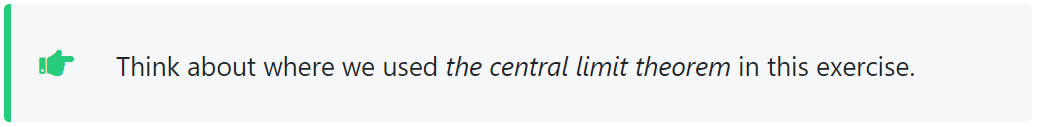